In [1]:

import pandas as pd

# Test file input
import os
for dirname, _, filenames in os.walk('C:/Users/THETHAWATKONGYU/Desktop/FaceMaskDetectionMain/dataset/images/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
#import the libraries
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import random as rand

In [4]:

#This function will get the coordinates of face given in the annotations file
# the coordinates of lower left corner and upper right corner
def generate_box(obj):  
    xmin = int(obj.find('xmin').text)
    ymin = int(obj.find('ymin').text)
    xmax = int(obj.find('xmax').text)
    ymax = int(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]
#This function will give label assciated with each label and convert them to numbers
def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0
#Using in this main function we parse the annotations file and get the objects out from them
# Also we use the above two functions here 
def generate_target(image_id, file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, 'xml')
        objects = soup.find_all('object')

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
            
        boxes=np.array(boxes)
        labels=np.array(labels)

        img_id = np.array(image_id)
    # Annotation is in dictionary format
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return (target,num_objs)

In [5]:
img_location = "C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/"
imgs = list(sorted(os.listdir(img_location)))
len(imgs)

853

In [21]:
annotations_location = "C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/annotations/"
labels = list(sorted(os.listdir(annotations_location)))
print(labels)

['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml', 'maksssksksss100.xml', 'maksssksksss101.xml', 'maksssksksss102.xml', 'maksssksksss103.xml', 'maksssksksss104.xml', 'maksssksksss105.xml', 'maksssksksss106.xml', 'maksssksksss107.xml', 'maksssksksss108.xml', 'maksssksksss109.xml', 'maksssksksss11.xml', 'maksssksksss110.xml', 'maksssksksss111.xml', 'maksssksksss112.xml', 'maksssksksss113.xml', 'maksssksksss114.xml', 'maksssksksss115.xml', 'maksssksksss116.xml', 'maksssksksss117.xml', 'maksssksksss118.xml', 'maksssksksss119.xml', 'maksssksksss12.xml', 'maksssksksss120.xml', 'maksssksksss121.xml', 'maksssksksss122.xml', 'maksssksksss123.xml', 'maksssksksss124.xml', 'maksssksksss125.xml', 'maksssksksss126.xml', 'maksssksksss127.xml', 'maksssksksss128.xml', 'maksssksksss129.xml', 'maksssksksss13.xml', 'maksssksksss130.xml', 'maksssksksss131.xml', 'maksssksksss132.xml', 'maksssksksss133.xml', 'maksssksksss134.xml', 'maksssksksss135.xml', 'maksssksksss136.xml', 'maksssksksss137.x

In [7]:
targets=[]#store coordinates
numobjs=[]#stores number of faces in each image
#run the loop for number of images we have
for i in range(853):
    file_image = 'maksssksksss'+ str(i) + '.png'
    file_label = 'maksssksksss'+ str(i) + '.xml'
    img_path = os.path.join(img_location, file_image)
    label_path = os.path.join(annotations_location, file_label)
    #Generate Label
    target,numobj = generate_target(i, label_path)
    targets.append(target)
    numobjs.append(numobj)
    

In [8]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
face_images=[]
face_labels=[]
for i in range(853):
    img_path = r"C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss{}.png".format(i)
    #read image
    print(img_path)
    img = cv2.imread(img_path)
    for j in range(numobjs[i]):
#       get coordinates of ith image in list 
        locs=(targets[i]['boxes'][j])
#     Get the face from the image using the coordinates
#the arguments are as ymin , ymax and xmin xmax
        img1=img[locs[1]:locs[3],locs[0]:locs[2]]
        img1 = cv2.resize(img1, (224, 224))
        img1 = img_to_array(img1)
        img1 = preprocess_input(img1)
        face_images.append(img1)
        face_labels.append(targets[i]['labels'][j])

face_images= np.array(face_images, dtype="float32")
face_labels = np.array(face_labels)



C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss0.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss1.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss2.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss3.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss4.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss5.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss6.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss7.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss8.png
C:/Users/THETHAWATKONGYU/Des

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss80.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss81.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss82.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss83.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss84.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss85.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss86.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss87.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss88.png
C:/Users/THETHAWATK

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss158.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss159.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss160.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss161.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss162.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss163.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss164.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss165.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss166.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss234.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss235.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss236.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss237.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss238.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss239.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss240.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss241.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss242.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss321.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss322.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss323.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss324.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss325.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss326.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss327.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss328.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss329.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss405.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss406.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss407.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss408.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss409.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss410.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss411.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss412.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss413.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss488.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss489.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss490.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss491.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss492.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss493.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss494.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss495.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss496.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss579.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss580.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss581.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss582.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss583.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss584.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss585.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss586.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss587.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss668.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss669.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss670.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss671.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss672.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss673.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss674.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss675.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss676.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss751.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss752.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss753.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss754.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss755.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss756.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss757.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss758.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss759.png
C:/Users/T

C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss829.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss830.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss831.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss832.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss833.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss834.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss835.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss836.png
C:/Users/THETHAWATKONGYU/Desktop/Github Repositories/FaceMaskDetectionMain/dataset/images/maksssksksss837.png
C:/Users/T

In [23]:
# len(face_labels)
# len(face_images)
# Check for labels
print(face_labels)

[0 1 0 ... 1 1 0]


In [13]:
unique, counts = np.unique(face_labels, return_counts=True)
dict(zip(unique, counts))

{0: 717, 1: 3232, 2: 123}

In [26]:
#Encode the labels in one hot encode form
lb = LabelEncoder()
labels = lb.fit_transform(face_labels)
labels = to_categorical(labels)
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [15]:
#Perform data augmentation.
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [12]:
#define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D((2,2),2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),     
     
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2), 
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2),2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
#define the hyperparamets for traing te neural network
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [17]:
#divide data into training and testing sets
(trainX, testX, trainY, testY) = train_test_split(face_images, labels,
	test_size=0.2, stratify=labels, random_state=42)

stuff = train_test_split(face_images, labels,
	test_size=0.2, stratify=labels, random_state=42)

In [16]:
#Complie the model and train it
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
class_weight = {0:5 , 1:1, 2:10}) #Here we sets weights to each class. 
#Class having high weight will be considered more importat while training

Epoch 1/20
101/101 [==============================] - 24s 235ms/step - loss: 1.6547 - accuracy: 0.6784 - val_loss: 0.7425 - val_accuracy: 0.6540
Epoch 2/20
101/101 [==============================] - 22s 218ms/step - loss: 1.2118 - accuracy: 0.7941 - val_loss: 0.5996 - val_accuracy: 0.7448
Epoch 3/20
101/101 [==============================] - 22s 214ms/step - loss: 1.0315 - accuracy: 0.8180 - val_loss: 0.5149 - val_accuracy: 0.7816
Epoch 4/20
101/101 [==============================] - 22s 214ms/step - loss: 1.0267 - accuracy: 0.8285 - val_loss: 0.4510 - val_accuracy: 0.8172
Epoch 5/20
101/101 [==============================] - 22s 214ms/step - loss: 0.9337 - accuracy: 0.8502 - val_loss: 0.5406 - val_accuracy: 0.7742
Epoch 6/20
101/101 [==============================] - 22s 214ms/step - loss: 0.9349 - accuracy: 0.8530 - val_loss: 0.4764 - val_accuracy: 0.8098
Epoch 7/20
101/101 [==============================] - 24s 234ms/step - loss: 0.8635 - accuracy: 0.8505 - val_loss: 0.3946 - val_ac

Printing Nueral Network Info...
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       143
           1       0.97      0.83      0.90       647
           2       0.23      0.56      0.33        25

    accuracy                           0.84       815
   macro avg       0.62      0.77      0.66       815
weighted avg       0.89      0.84      0.85       815



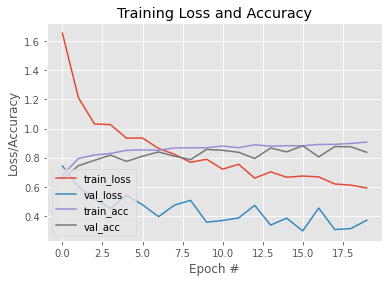

In [17]:
print("Printing Nueral Network Info...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs
	))

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
#save the first trained model
model.save('face_detection.h5')

In [19]:
#load the saved model
from tensorflow import keras
model = keras.models.load_model('face_detection.h5')

In [20]:
#train the saved model again 
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
class_weight = {0:5 , 1:1, 2:10})

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
101/101 [==============================] - 23s 230ms/step - loss: 0.6336 - accuracy: 0.8881 - val_loss: 0.3173 - val_accuracy: 0.8785
Epoch 2/20
101/101 [==============================] - 22s 214ms/step - loss: 0.5962 - accuracy: 0.8921 - val_loss: 0.3724 - val_accuracy: 0.8405
Epoch 3/20
101/101 [==============================] - 22s 215ms/step - loss: 0.6053 - accuracy: 0.8989 - val_loss: 0.3680 - val_accuracy: 0.8454
Epoch 4/20
101/101 [==============================] - 23s 223ms/step - loss: 0.5538 - accuracy: 0.9036 - val_loss: 0.3547 - val_accuracy: 0.8491
Epoch 5/20
101/101 [==============================] - 24s 233ms/step - loss: 0.5355 - accuracy: 0.9005 - val_loss: 0.2844 - val_accuracy: 0.8896
Epoch 6/20
101/101 [==============================] - 24s 234ms/step - loss: 0.5732 - accuracy: 0.9017 - val_loss: 0.2924 - val_accuracy: 0.8859
Epoch 7/20
101/101 [==============================] - 23s 231ms/step - loss: 0.5

Evaluating Nueral Network once again...
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       143
           1       0.97      0.89      0.93       647
           2       0.33      0.60      0.42        25

    accuracy                           0.88       815
   macro avg       0.67      0.79      0.72       815
weighted avg       0.91      0.88      0.89       815



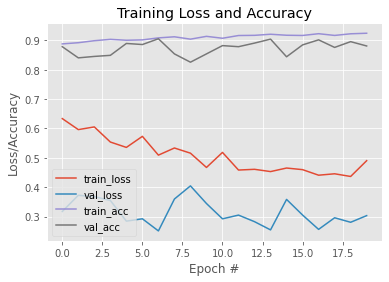

In [21]:
#Evaluate the model again
print("Evaluating Nueral Network once again...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs
	))

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
#As you can see, most of the code above were mostly for data set preparations which was provided by Kaggle.